In [1]:
# import images
# loop images
# proccess

In [99]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.preprocessing import image

In [100]:
images_dir = "images"

In [101]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            size = img.shape
            size = (int(size[1]/3), int(size[0]/3))
            resized_img = cv2.resize(img, size, interpolation= cv2.INTER_LINEAR)
            images.append(resized_img)
    return images

images = load_images_from_folder(images_dir)

In [246]:
def histogram_stretching(img):
    stretching_constant = 255/(img.max() - img.min())
    return ((img - img.min()) * stretching_constant).astype("uint8")

def histogram_stretching_plus(img):
    new_cols = []
    for col in img.T:
        stretching_constant = 255/(col.max() - col.min())
        new_cols.append((col - col.min()) * stretching_constant)
    return (np.array(new_cols).T).astype(int)

def mean_subtraction(img):
    row_mean = np.mean(img, axis=1)
    mean_background = np.array([[mean for i in range(img.shape[1])] for mean in row_mean])
    mean_subtract = img - mean_background
    mean_subtract = mean_subtract.astype("uint8")
    mean_subtract = mean_subtract - mean_subtract.min()
    return mean_subtract

def mean_subtraction_plus(img):
    row_mean = np.mean(img, axis=1)
    
    mean_background = np.array([[mean for i in range(img.shape[1])] for mean in row_mean]).astype(int)
    
    mean_subtract = (img - mean_background).astype(int)
    
    mean_subtract = mean_subtract - mean_subtract.min()
    
    return mean_subtract.astype(int)

def median_subtraction(img, size):
    median = cv2.medianBlur(img, size)
    subtract = img.astype(int) - median.astype(int)
    final = subtract - subtract.min()
    return final

def crop_image(img, height, width):
    new_img = img[height:img.shape[0]-height, width:img.shape[1]-width]
    return new_img

In [475]:
vein_segmentations = []
coefficients = []

kernel_open = np.ones((2,2), np.uint8)
kernel_close = np.ones((2,2), np.uint8)

for img in images:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #img = mean_subtraction_plus(img)
    
    #img = median_subtraction(img, 101)
    
    #img = histogram_stretching(img)
    
    img = cv2.adaptiveThreshold(img.astype("uint8"), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 89, 3)
    
    img = cv2.bitwise_not(img)
    
    #img = cv2.erode(img, kernel, iterations = 1)
    #img = cv2.dilate(img, kernel, iterations = 1)
    
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_open)
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_close)
    
    #img = cv2.medianBlur(img, 5)
    
    #img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    
    #img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    
    vein_segmentations.append(img)

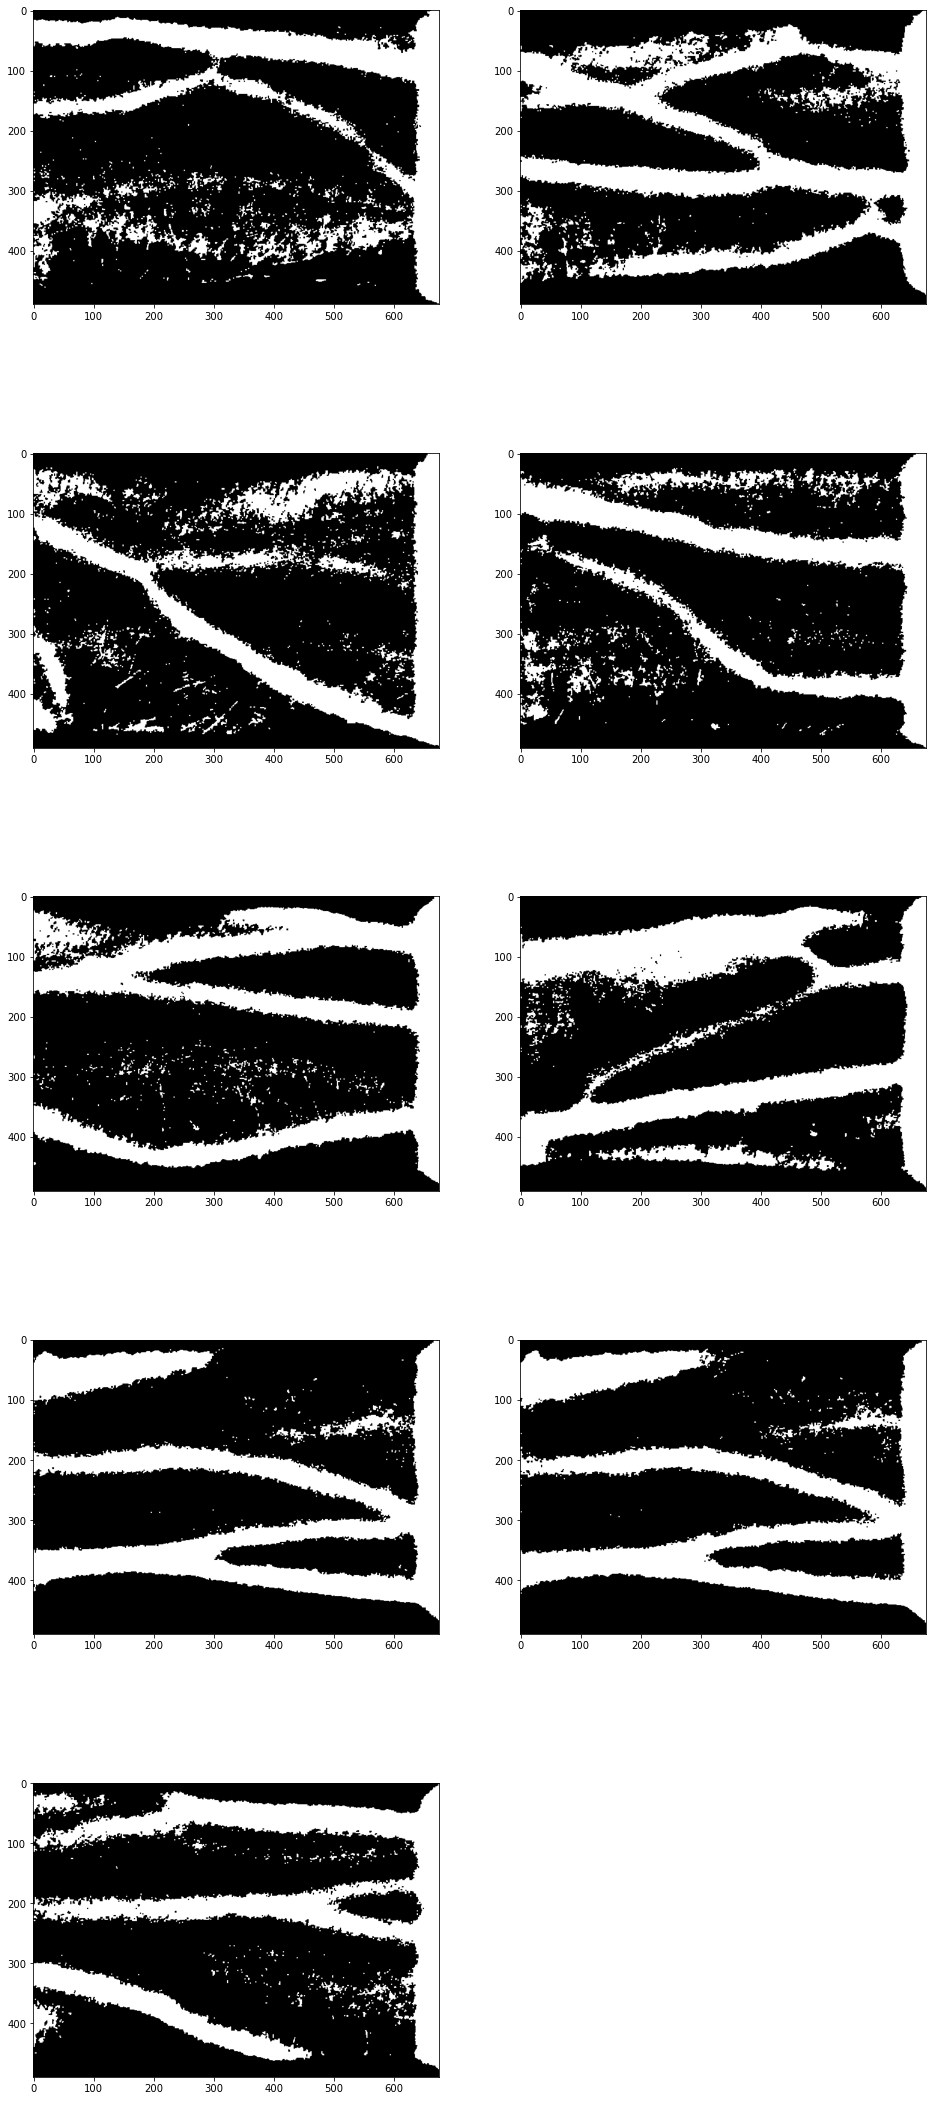

In [476]:
number = len(vein_segmentations)

fig = plt.figure(figsize=(16, 16*number/2))
columns = 2
rows = number
for i in range(0, number):
    img = vein_segmentations[i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img, cmap="gray")
plt.show()

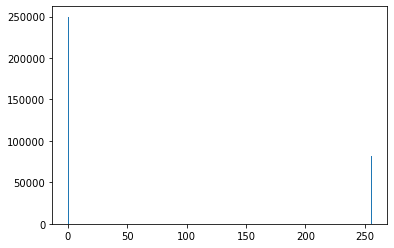

In [477]:
plt.hist(vein_segmentations[0].ravel(),256,[0,256])
plt.show()